In [ ]:
import numpy as np, pandas as pd
from sklearn import linear_model
import datetime
import seaborn as sb
import matplotlib.pyplot as plt#set pandas options to show max vols and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Import the Dataset and do basic data wrangling

In [ ]:
#Load the dataset and parse Dates in the format dd-mm-yy
Dataset=pd.read_csv('/content/drive/My Drive/Walmart_Store_sales.csv',parse_dates=['Date'], dayfirst=True)
print(Dataset.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
Dataset[Dataset['Store']==1].describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.0,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420
std,0.0,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749
min,1.0,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000
50%,1.0,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000
75%,1.0,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000
max,1.0,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000


 Check for na's

In [ ]:
Dataset.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Check for zeroes in significant columns. Holiday flag is encoded hence it's okay to have zeroes in it

In [ ]:
print('Zeroes in columns')
print(Dataset.Store[Dataset['Store']==0].shape[0])
print(Dataset.Date[Dataset['Date']==0].shape[0])
print(Dataset.Weekly_Sales[Dataset['Weekly_Sales']==0].shape[0])
print(Dataset.Holiday_Flag[Dataset['Holiday_Flag']==0].shape[0])
print(Dataset.Temperature[Dataset['Temperature']==0].shape[0])
print(Dataset.Fuel_Price[Dataset['Fuel_Price']==0].shape[0])
print(Dataset.CPI[Dataset['CPI']==0].shape[0])
print(Dataset.Unemployment[Dataset['Unemployment']==0].shape[0])

Zeroes in columns
0
0
0
5985
0
0
0
0


# *Basic Statistics tasks:*

In [ ]:
#df=Dataset[['Store','Weekly_Sales']]
#group_by_store = df.groupby('Store')
#VERIFYING STORE 1 RECORD COUNTS
#group_by_store.get_group(1)['Weekly_Sales']. describe ()

#Ans(1) Find the store with maximum sales

In [ ]:
stores = list(set(Dataset['Store']))
store_wise_sales=[]
for i in stores:
 store_wise_sales.append(group_by_store.get_group(i)['Weekly_Sales'].sum())
print("Store #{} has the maximum sales of \n${:.2f}".format(store_wise_sales.index(max(store_wise_sales))+1,(max(store_wise_sales))))

Store #20 has the maximum sales of 
$301397792.46


#ANS(2) Store that has maximum standard deviation:

In [ ]:
SD=[]
for i in stores:
 SD.append(group_by_store.get_group(i)['Weekly_Sales'].std(axis=0))
print('Max Standard deviation in sales of \n${:.2f} was observed at store #{}'.format(max(SD),SD.index(max(SD))+1))

Max Standard deviation in sales of 
$317569.95 was observed at store #14


#The coefficient of standard deviation to mean (Coefficient of variance)

In [ ]:
CoV=[]
for i in stores:
 CoV.append((np.std(group_by_store.get_group(i)['Weekly_Sales']) /np.mean(group_by_store.get_group(i)['Weekly_Sales']))*100)
print("coefficient of variation by Total sales (Store-wise):")
for i in stores:
 print("Store #{}: {:.4f}".format(i,CoV[i-1]))

coefficient of variation by Total sales (Store-wise):
Store #1: 9.9941
Store #2: 12.2992
Store #3: 11.4619
Store #4: 12.6637
Store #5: 11.8253
Store #6: 13.5347
Store #7: 19.6614
Store #8: 11.6543
Store #9: 12.6451
Store #10: 15.8576
Store #11: 12.1834
Store #12: 13.7442
Store #13: 13.2049
Store #14: 15.6586
Store #15: 19.2707
Store #16: 16.4602
Store #17: 12.5081
Store #18: 16.2275
Store #19: 13.2215
Store #20: 13.0444
Store #21: 16.9696
Store #22: 15.6234
Store #23: 17.9092
Store #24: 12.3204
Store #25: 15.9300
Store #26: 10.9725
Store #27: 13.4682
Store #28: 13.6849
Store #29: 18.3099
Store #30: 5.1826
Store #31: 8.9845
Store #32: 11.7896
Store #33: 9.2543
Store #34: 10.7846
Store #35: 22.8877
Store #36: 16.2009
Store #37: 4.1937
Store #38: 11.0487
Store #39: 14.9383
Store #40: 12.2997
Store #41: 14.7658
Store #42: 9.0019
Store #43: 6.3879
Store #44: 8.1507
Store #45: 16.5033


Just another way of getting mean and SD

In [ ]:
#print(group_by_store.get_group(14)['Weekly_Sales'].std(axis=0))
#print(group_by_store.get_group(14)['Weekly_Sales'].mean(axis=0))

#Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together#

In [ ]:
#Create a temporary dataset to house the variables of interest 
df=Dataset[['Date','Store','Weekly_Sales','Holiday_Flag']]
#pivot the frame appropriately
pivot_df=df.pivot_table(values='Weekly_Sales',index='Date', columns='Store')
#get sum of all stores for each date
pivot_df=pd.DataFrame(pivot_df.sum(axis=1))
pivot_df.columns=['Monthly_Sales']
pivot_df

,Monthly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
2010-03-12,45925396.51
2010-03-19,44988974.64
2010-03-26,44133961.05
2010-04-02,50423831.26


In [ ]:
#Since the dataset needs the holiday flag 
#use indices to map corresponding flag to observations in table
hFlag=[]
for indices in pivot_df.index:
 hFlag.append(df.Holiday_Flag[df['Date']==indices])
#print(hFlag)
#Since hFlag values are repeated for each store replace it with mean
for i in range(len(hFlag)):
 hFlag[i]=int(np.mean(hFlag[i]))
#print(hFlag)
 
#insert column flag to storewide data
pivot_df['Holiday_Flag']=hFlag
pivot_df

,Monthly_Sales,Holiday_Flag
Date,,
2010-02-05,49750740.50,0
2010-02-12,48336677.63,1
2010-02-19,48276993.78,0
2010-02-26,43968571.13,0
2010-03-05,46871470.30,0
2010-03-12,45925396.51,0
2010-03-19,44988974.64,0
2010-03-26,44133961.05,0
2010-04-02,50423831.26,0


In [ ]:
#Verify holiday week counts
holiday_sales=pivot_df[pivot_df['Holiday_Flag']==1]
holiday_sales

,Monthly_Sales,Holiday_Flag
Date,,
2010-02-12,48336677.63,1
2010-09-10,45634397.84,1
2010-11-26,65821003.24,1
2010-12-31,40432519.00,1
2011-02-11,47336192.79,1
2011-09-09,46763227.53,1
2011-11-25,66593605.26,1
2011-12-30,46042461.04,1
2012-02-10,50009407.92,1


In [ ]:
#Get mean of non-holiday weeks
non_holiday_mean=pivot_df.Monthly_Sales[pivot_df['Holiday_Flag']==0].mean()
non_holiday_mean

46856537.10939851

In [ ]:
#some Holidays have sales LESS THAN mean of non holiday weeks
holiday_sales[holiday_sales['Monthly_Sales']<non_holiday_mean]

,Monthly_Sales,Holiday_Flag
Date,,
2010-09-10,45634397.84,1
2010-12-31,40432519.00,1
2011-09-09,46763227.53,1
2011-12-30,46042461.04,1


ANS (3) HOLIDAY HAVING SALES GREATER THAN MEAN OF NON-HOLIDAYS

In [ ]:
#HOLIDAY HAVING SALES GREATER THAN MEAN OF NON-HOLIDAYS
print("Holidays with higher than Normal sales")
holiday_sales[holiday_sales['Monthly_Sales']>non_holiday_mean]

Holidays with higher than Normal sales


,Monthly_Sales,Holiday_Flag
Date,,
2010-02-12,48336677.63,1
2010-11-26,65821003.24,1
2011-02-11,47336192.79,1
2011-11-25,66593605.26,1
2012-02-10,50009407.92,1
2012-09-07,48330059.31,1


 
#Which store/s has good quarterly growth rate in Q3’2012#

Since we want quarterly growth rate of Q3 for the FY 2012, The comparison will be done with Q2 of 2012, following the formula sum(Q3) - sum(Q2)

In [ ]:
yearly_sales=df.pivot_table(values='Weekly_Sales',index='Date', columns='Store')
yearly_sales['year'] = pd.PeriodIndex(yearly_sales.index, freq= 'M').year
yearly_sales

Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,year
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,1528008.64,1100046.37,1967220.53,2623469.95,652122.44,477409.30,789036.02,1205307.50,1507637.17,2401395.47,798593.88,1033017.37,1364721.58,1388725.63,677231.63,1034119.21,1874289.79,1672352.29,538634.46,465108.52,1469252.05,1087616.19,274593.43,956228.96,1230613.50,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51,2010
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,1574684.08,1117863.33,2030933.46,1704218.84,682447.10,472044.28,841951.91,1187880.70,1536549.95,2109107.90,809321.44,1022571.25,1380892.08,1414107.10,583364.02,1015684.09,1745362.72,1558968.49,529672.95,497374.57,1543947.23,1123566.12,294882.83,994610.99,1168815.31,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64,2010
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,1503298.70,1095421.65,1970274.64,2204556.70,660838.75,469868.70,800714.00,1150663.42,1515976.11,2161549.76,867283.25,988467.61,1319588.04,1385362.49,676260.67,999348.55,1945070.33,1491300.42,542399.07,463513.26,1473386.75,1082559.06,296850.83,983963.07,1270658.64,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04,2010
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,1336404.65,1048617.17,1817850.32,2095591.63,564883.20,443242.17,749549.55,1068157.45,1373270.06,1898193.95,749597.24,899761.48,1198709.65,1158722.74,628516.57,855385.01,1390934.27,1542173.33,488417.61,472330.71,1344354.41,1053247.10,284052.77,905756.13,1020651.74,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65,2010
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,1426622.65,1077018.27,1939980.43,2237544.75,605325.43,444181.85,783300.05,1179738.50,1495844.57,2119213.72,747444.32,1009201.24,1311175.93,1412387.37,665750.06,1005669.58,1313729.72,1608435.45,535087.91,472591.07,1384870.51,1066566.74,291484.89,918295.79,1162610.27,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22,2010
2010-03-12,1439541.59,1990483.78,384200.69,1894324.09,297293.59,1558621.36,480452.10,860336.16,494145.80,1941346.13,1331883.16,985594.23,1840686.94,2156035.06,604173.59,445393.74,763961.82,1138800.32,1467889.20,2010974.84,712312.89,967187.37,1408082.96,1309340.16,660619.99,963382.09,1925113.12,1326877.11,519042.49,468189.93,1366193.35,1093319.37,312161.00,921247.88,1150344.39,441434.20,513015.35,342023.92,1244391.83,899352.40,1023997.71,588363.62,645386.94,272190.83,765687.42,2010
2010-03-19,1472515.79,1946070.88,375328.59,1897429.36,281706.41,1693058.91,574450.23,839911.00,485744.61,1946875.06,1364207.00,972088.34,1879794.89,2066219.30,593710.67,504307.35,752034.52,1087507.47,1332940.35,1951848.43,727070.00,966145.09,1229008.32,1222511.29,659795.84,903366.55,1700627.97,1279819.43,496851.60,445736.36,1332261.01,1059781.78,282235.73,892070.82,1117536.09,428851.99,460020.74,333025.47,1301590.13,894865.30,1006597.69,519914.10,668098.49,269624.20,773819.49,2010
2010-03-26,1404429.92,1750197.81,359949.27,1762539.30,273282.97,1472033.38,514731.60,772539.12,484946.56,1893532.46,1245624.27,981615.81,1882095.98,2050396.27,592111.49,483177.20,793097.64,1092704.09,1427023.45,1894742.95,686497.53,1012075.12,1310701.80,1258311.56,696687.60,893613.00,1836714.84,1245268.77,552985.34,442457.35,1229635.70,1076021.58,262893.76,880742.35,1078900.44,404438.51,515777.9

In [ ]:
#Choose only year 2012
Quarterly_sales= yearly_sales[yearly_sales['year']==2012]
indices = Quarterly_sales.index
Quatr=[]
month=pd.PeriodIndex(indices, freq = 'M').month
#implemebtation to set QTR flag 
for i in month:
 if i in range(1,4):
  Quatr.append('Q1')
 elif i in range(4,7):
  Quatr.append('Q2')
 elif i in range(7,10):
  Quatr.append('Q3')
 else:
  Quatr.append('Q4')
len(Quatr)
Quarterly_sales['Qtr'] = Quatr
Quarterly_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,year,Qtr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-06,1550369.92,1799520.14,398178.21,2047766.07,312078.71,1395339.71,713117.66,872113.23,519585.67,1683401.78,1283885.55,945823.65,1865752.78,1859144.96,516087.65,564538.07,1198104.22,977286.07,1266570.40,1964701.94,640181.86,895358.20,1150662.55,1251581.89,636419.12,971557.62,1535287.40,1466046.07,469773.85,457030.86,1401232.52,1099937.25,267058.08,953844.85,671708.09,329467.82,558343.57,478483.20,1478537.93,954576.86,1208191.61,636372.37,670993.01,325327.93,714081.05,2012,Q1
2012-01-13,1459601.17,1744725.48,367438.62,1941676.61,291454.52,1344243.17,593875.46,817661.76,474964.60,1711562.73,1264736.59,865467.86,1794962.64,1696248.27,454183.42,508520.09,873576.96,890130.25,1182198.70,1911510.64,631181.25,855437.57,1031451.35,1155594.20,614764.31,836305.65,1492399.13,1161190.29,444756.37,447023.91,1377485.12,1071598.36,279447.22,913755.12,625135.11,325976.34,546221.40,423260.82,1369125.37,780607.52,1134767.28,664348.20,663529.64,312361.88,676615.53,2012,Q1
2012-01-20,1394393.84,1711769.11,365818.61,2005097.76,287523.98,1326255.70,578002.85,813954.82,480130.04,1675562.94,1207303.29,855922.64,1811606.21,1789113.32,492721.85,474389.75,809272.65,937522.77,1237104.73,1892775.94,651178.20,897027.44,1146992.13,1151993.85,594744.89,838751.50,1542131.05,1129540.48,446863.31,438760.62,1372504.90,1080012.04,244899.20,910899.05,669850.04,330927.21,543894.07,405215.91,1394841.03,811365.42,1116295.24,579499.93,619225.65,316948.39,700392.21,2012,Q1
2012-01-27,1319325.59,1660906.14,349518.10,1928720.51,295974.22,1315610.66,541037.98,778178.53,482451.21,1632406.00,1162675.85,888203.69,1733983.09,1595362.27,466045.63,453979.19,769522.33,825584.22,1279623.26,1761016.51,611258.71,786459.23,1037476.38,1057290.41,589554.29,820059.89,1263534.86,1132948.48,395987.24,433037.66,1259941.48,1051864.60,236920.49,872450.37,588722.99,301444.94,514116.58,412882.31,1320301.61,770157.29,1079398.81,538978.67,587685.38,308295.38,624081.64,2012,Q1
2012-02-03,1636339.65,1935299.94,424960.66,2173373.91,333948.00,1496305.78,580453.32,927610.69,549967.89,1867403.01,1376732.18,1058767.95,1927780.74,1877410.36,523831.64,475905.10,864852.85,1049772.04,1345311.65,2203523.20,680725.43,958487.75,1261872.67,1249696.97,642776.40,939158.25,1564246.02,1531599.44,493159.35,434080.74,1391479.91,1156826.31,256091.32,939367.14,746901.03,310982.87,555424.24,457711.68,1396150.15,979552.34,1208825.60,588448.21,629176.71,325986.05,757330.95,2012,Q1
2012-02-10,1802477.43,2103322.68,473292.47,2374660.64,349239.88,1620603.92,563460.77,1021400.42,609736.12,2218595.80,1574287.76,1199330.85,2069284.57,2077256.24,628218.22,473766.97,880165.70,1161615.51,1499496.67,2462978.28,770652.79,1034448.07,1358444.07,1403460.87,658984.38,1081005.64,1651605.35,1572966.15,545840.05,451365.99,1527688.58,1129422.86,282552.58,1047658.09,849779.14,335741.90,527041.46,469787.38,1442988.44,999785.48,1238844.56,674919.45,662198.65,325377.97,803657.12,2012,Q1
2012-02-17,1819870.00,2196688.46,475591.08,2427640.17,356427.98,1632616.09,620908.18,1096232.89,658965.05,2168709.76,1569607.94,1240048.85,2214477.06,2020550.99,598502.83,494069.49,927084.65,1115985.81,1424720.27,2309025.16,834663.52,1004749.41,1365546.69,1326370.08,654088.02,965788.76,1606221.56,1501503.68,559606.91,435109.11,1570813.52,1243812.59,266300.98,1123446.51,824568.39,326316.73,541071.29,415513.97,1511041.69,975500.87,1330451.46,606671.50,660632.05,320691.21,858853.75,2012,Q1
2012-02-24,1539387.83,1861802.70,418925.47,2226662.17,312220.47,1465187.71,603041.14,928537.54,563578.79,2039415.74,1379473.03,1112034.72,1929768.03,1875040.16,561137.06,495720.30,843864.43,1037861.11,1352470.09,2045837.55,747099.07,912958.95,1272948.27,1303233.15,613501.05,917924.47,1648602.39,1323487.91,488782.63,425215.71,1392543.37,1091822.72,242526.70,950154.24,805028.74,31327

In [ ]:
#Clean up unwanted columns
Quarterly_sales.drop('year', axis=1, inplace=True)
Quarterly_sales

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,Qtr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-06,1550369.92,1799520.14,398178.21,2047766.07,312078.71,1395339.71,713117.66,872113.23,519585.67,1683401.78,1283885.55,945823.65,1865752.78,1859144.96,516087.65,564538.07,1198104.22,977286.07,1266570.40,1964701.94,640181.86,895358.20,1150662.55,1251581.89,636419.12,971557.62,1535287.40,1466046.07,469773.85,457030.86,1401232.52,1099937.25,267058.08,953844.85,671708.09,329467.82,558343.57,478483.20,1478537.93,954576.86,1208191.61,636372.37,670993.01,325327.93,714081.05,Q1
2012-01-13,1459601.17,1744725.48,367438.62,1941676.61,291454.52,1344243.17,593875.46,817661.76,474964.60,1711562.73,1264736.59,865467.86,1794962.64,1696248.27,454183.42,508520.09,873576.96,890130.25,1182198.70,1911510.64,631181.25,855437.57,1031451.35,1155594.20,614764.31,836305.65,1492399.13,1161190.29,444756.37,447023.91,1377485.12,1071598.36,279447.22,913755.12,625135.11,325976.34,546221.40,423260.82,1369125.37,780607.52,1134767.28,664348.20,663529.64,312361.88,676615.53,Q1
2012-01-20,1394393.84,1711769.11,365818.61,2005097.76,287523.98,1326255.70,578002.85,813954.82,480130.04,1675562.94,1207303.29,855922.64,1811606.21,1789113.32,492721.85,474389.75,809272.65,937522.77,1237104.73,1892775.94,651178.20,897027.44,1146992.13,1151993.85,594744.89,838751.50,1542131.05,1129540.48,446863.31,438760.62,1372504.90,1080012.04,244899.20,910899.05,669850.04,330927.21,543894.07,405215.91,1394841.03,811365.42,1116295.24,579499.93,619225.65,316948.39,700392.21,Q1
2012-01-27,1319325.59,1660906.14,349518.10,1928720.51,295974.22,1315610.66,541037.98,778178.53,482451.21,1632406.00,1162675.85,888203.69,1733983.09,1595362.27,466045.63,453979.19,769522.33,825584.22,1279623.26,1761016.51,611258.71,786459.23,1037476.38,1057290.41,589554.29,820059.89,1263534.86,1132948.48,395987.24,433037.66,1259941.48,1051864.60,236920.49,872450.37,588722.99,301444.94,514116.58,412882.31,1320301.61,770157.29,1079398.81,538978.67,587685.38,308295.38,624081.64,Q1
2012-02-03,1636339.65,1935299.94,424960.66,2173373.91,333948.00,1496305.78,580453.32,927610.69,549967.89,1867403.01,1376732.18,1058767.95,1927780.74,1877410.36,523831.64,475905.10,864852.85,1049772.04,1345311.65,2203523.20,680725.43,958487.75,1261872.67,1249696.97,642776.40,939158.25,1564246.02,1531599.44,493159.35,434080.74,1391479.91,1156826.31,256091.32,939367.14,746901.03,310982.87,555424.24,457711.68,1396150.15,979552.34,1208825.60,588448.21,629176.71,325986.05,757330.95,Q1
2012-02-10,1802477.43,2103322.68,473292.47,2374660.64,349239.88,1620603.92,563460.77,1021400.42,609736.12,2218595.80,1574287.76,1199330.85,2069284.57,2077256.24,628218.22,473766.97,880165.70,1161615.51,1499496.67,2462978.28,770652.79,1034448.07,1358444.07,1403460.87,658984.38,1081005.64,1651605.35,1572966.15,545840.05,451365.99,1527688.58,1129422.86,282552.58,1047658.09,849779.14,335741.90,527041.46,469787.38,1442988.44,999785.48,1238844.56,674919.45,662198.65,325377.97,803657.12,Q1
2012-02-17,1819870.00,2196688.46,475591.08,2427640.17,356427.98,1632616.09,620908.18,1096232.89,658965.05,2168709.76,1569607.94,1240048.85,2214477.06,2020550.99,598502.83,494069.49,927084.65,1115985.81,1424720.27,2309025.16,834663.52,1004749.41,1365546.69,1326370.08,654088.02,965788.76,1606221.56,1501503.68,559606.91,435109.11,1570813.52,1243812.59,266300.98,1123446.51,824568.39,326316.73,541071.29,415513.97,1511041.69,975500.87,1330451.46,606671.50,660632.05,320691.21,858853.75,Q1
2012-02-24,1539387.83,1861802.70,418925.47,2226662.17,312220.47,1465187.71,603041.14,928537.54,563578.79,2039415.74,1379473.03,1112034.72,1929768.03,1875040.16,561137.06,495720.30,843864.43,1037861.11,1352470.09,2045837.55,747099.07,912958.95,1272948.27,1303233.15,613501.05,917924.47,1648602.39,1323487.91,488782.63,425215.71,1392543.37,1091822.72,242526.70,950154.24,805028.74,313270.45,518696.89,409411.61,1412065.04,91930

In [ ]:
#get quarterly sum of sales
Q_sales= Quarterly_sales.groupby(['Qtr']).agg('sum' )
Q_sales

Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Qtr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q1,20723762.83,24528220.70,5421809.72,27930310.30,4237380.83,19467939.96,7792647.21,11869407.28,7209983.86,24488944.65,17713050.31,13585746.35,25182790.59,24476492.09,7020781.97,6400479.72,11460215.01,13190110.09,17237532.28,26971607.79,9308307.68,12236244.62,16049454.58,16130180.70,8287084.85,12071075.04,20293011.81,17715246.14,6361590.26,5700327.43,18327012.80,14596588.10,3387560.76,12561536.03,9642858.59,4165563.14,6905516.43,5645775.74,18740604.09,11680404.16,15681607.44,7823655.75,8332318.07,4109696.37,9805267.57
Q2,20978760.12,25083604.88,5620316.49,28454363.67,4466363.69,20833909.92,7290859.27,11919630.95,7484935.11,23750369.17,17787371.95,13362388.58,27009207.14,25155535.41,7955243.07,6564335.98,12592400.93,13896194.65,18367300.24,27524197.32,9294596.35,13487894.06,18488882.82,17684218.91,9323012.09,13155335.57,22744012.75,16506893.13,7125307.50,5742314.29,18267238.50,15489271.05,3549000.39,12853618.02,10838313.00,4151991.58,6824549.37,5637918.82,20214128.46,12727737.53,17659942.73,7568239.27,8168836.35,4306405.78,10390767.83
Q3,20253947.78,24303354.86,5298005.47,27796792.46,4163790.99,20167312.24,8262787.39,11748952.70,7022149.56,23037258.76,17516081.44,12536324.37,26421259.30,21187560.65,7612081.03,7121541.64,12459453.05,13489765.27,18203554.85,26891526.98,9027599.32,12845139.71,18641489.15,17976377.72,9109081.84,13675691.91,22307711.41,16080704.97,6671234.14,5594701.86,17806714.45,15396528.95,3433620.36,12485995.94,11322421.12,3831691.64,6728068.24,5605482.38,20715116.23,12873195.37,18093844.01,7296759.34,8000572.16,4411251.16,9581268.38
Q4,6245587.29,7581514.93,1684307.82,8589722.81,1301302.62,5845884.88,2021262.60,3695929.20,2256961.05,6952044.36,5167561.98,3850386.42,8094197.99,6621810.11,2239424.64,2016067.98,3773309.64,4342506.79,5404045.91,8440377.29,2621383.36,4086377.84,5588152.20,5395618.84,2771326.93,4074341.77,6575320.15,5026062.83,2086249.72,1758306.50,5483441.47,4798727.90,1065369.52,3838014.16,3434129.81,1137224.17,2154640.65,1741896.51,6215814.07,3891070.28,5452445.75,2261705.49,2473507.39,1360020.41,2946326.39


ANS (4) Check which store had max growth in Q3-2012

In [ ]:
 Q_growth= ((Q_sales.loc['Q3']- Q_sales.loc['Q2'])/Q_sales.loc['Q2']) *100
growth=Q_growth[Q_growth==Q_growth.max()].index[0]
print("Store #{} had the max relative growth ((Q3-Q2)/Q2)*100 of:\n{:.2f}%".format(growth,Q_growth.max()))

Store #7 had the max relative growth ((Q3-Q2)/Q2)*100 of:
13.33%


In [ ]:
Q_growth= Q_sales.loc['Q3']- Q_sales.loc['Q2']
growth=Q_growth[Q_growth==Q_growth.max()].index[0]
print("Store #{} outperformed it's Q2 with surplus sales of:\n{:.2f}".format(growth,Q_growth.max()))

Store #7 outperformed it's Q2 with surplus sales of:
971928.12


In [ ]:
#Which store made the most sales in Q3 2012
Q_max= Q_sales.loc['Q3']
print("Store #{} had the max sales in Q3 of:\n{}(highest among all stores in Q3)".format(Q_max[Q_max==Q_max.max()].index[0],Q_max.max()))

Store #4 had the max sales in Q3 of:
27796792.46(highest among all stores in Q3)


#Provide a monthly and semester view of sales in units and give insights

In [ ]:
monthly =yearly_sales.groupby(pd.PeriodIndex(yearly_sales.index, freq= 'M')).sum()
monthly.drop('year',axis=1,inplace=True)
monthly['Total_sales_monthly']=monthly.sum(axis=1)
monthly

Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,Total_sales_monthly
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02,6307344.10,8264347.77,1711198.23,8299040.36,1202728.00,6259010.24,2023674.14,3810490.97,2087284.20,8489284.81,5942396.07,4361948.52,7786278.95,8627837.12,2560291.49,1862564.45,3181251.48,4612009.07,5933433.29,8570247.08,3224795.81,3943817.71,5263911.35,5346917.96,2565372.89,3904536.86,6955657.11,6264794.53,2099124.09,1898327.06,5830940.44,4346988.47,1150379.86,3840559.15,4690739.19,1854910.91,2089857.75,1362171.69,4895999.86,3737488.70,4206165.99,2119399.42,2607648.61,1108983.45,3130833.84,1.903330e+08
2010-03,5871293.98,7677765.60,1534680.59,7525350.19,1141138.68,6325062.47,2061053.48,3354290.23,1972134.85,7768843.74,5368337.08,4016316.65,7542558.24,8510195.38,2395321.18,1877060.14,3092394.03,4498750.38,5723697.57,7976779.94,2873324.74,3954608.82,5258969.01,5202550.38,2682853.49,3766031.22,6776185.65,5460400.76,2103967.34,1828974.71,5312960.57,4295689.47,1148775.38,3612356.84,4509391.19,1754928.13,2008069.74,1383147.39,5047330.83,3657724.56,4109349.35,2141271.82,2595183.41,1102711.79,3100021.51,1.819198e+08
2010-04,7422801.92,9520276.09,1895382.98,9269170.71,1553822.75,7995878.23,2230043.44,4342564.85,2540761.94,9626179.20,6763295.37,4959112.35,9555618.05,11096700.43,3208173.84,2104681.96,4162077.51,5757012.72,7454797.16,10196891.70,3620185.31,5158758.26,6684323.64,6650161.81,3651901.68,4744126.11,9523358.57,6523307.50,2685010.45,2302333.91,6644425.09,5449652.86,1446761.46,4623620.27,5679817.12,2264705.73,2622932.69,1721384.97,6577921.31,4505475.08,5425674.24,2607968.47,3288140.80,1374892.23,3980285.29,2.314124e+08
2010-05,5929938.64,7777385.06,1477534.20,7637509.72,1241824.97,6320388.54,1606057.64,3476533.57,2083339.88,7481720.32,5115045.05,3923120.96,7626768.36,8835226.91,2617105.06,1719718.63,3357048.86,4672776.11,6030138.01,8130135.85,2977105.28,4110276.90,5567190.21,5513839.38,2919098.68,4103759.92,7580988.87,5173303.91,2167087.71,1837978.03,5315928.16,4562454.30,1231554.17,3743904.62,4588337.11,1888074.16,2091166.77,1396798.25,5298917.48,3811156.51,4702065.81,2135691.96,2684728.03,1130852.14,3119359.64,1.867109e+08
2010-06,6084081.46,8069642.74,1473409.22,7550298.11,1243520.70,6860962.56,2042623.05,3557902.94,2131114.29,7364736.54,5334441.04,3979615.96,8034361.74,9107997.01,2637053.35,2138587.93,3494146.79,4849042.67,5837419.14,8369148.64,3145271.07,4304651.18,5876781.38,5695369.05,3019332.72,4054594.01,7796722.80,5391317.32,2273014.77,1804811.62,5476330.64,4616264.51,1127719.78,3758281.18,4871062.92,1859374.65,1952291.14,1388752.14,5532340.53,3973514.03,4899440.07,2177010.92,2691242.39,1160898.62,3239677.04,1.922462e+08
2010-07,7244483.04,9316686.92,1783914.22,9237037.48,1422175.50,8127765.74,2899977.83,4119065.06,2419603.89,9108079.77,6367935.07,4637818.27,9546628.09,10800283.49,3251815.91,2962456.29,4399404.76,5656300.22,7277156.61,10139247.27,3662946.43,5146203.80,7033181.07,7368845.52,3553412.11,5205903.63,9649148.99,6321680.12,2673589.85,2203084.67,6470282.02,5560339.22,1345638.87,4538737.74,5899896.92,2257400.89,2465809.65,1708024.76,6645706.92,4980793.62,6032498.26,2596789.98,3354094.26,1445902.04,3742379.21,2.325801e+08
2010-08,6075952.95,7715686.75,1456095.44,7760274.34,1165245.50,6171593.19,2378701.98,3520812.20,2010828.47,7622988.77,5495429.46,3848805.15,7752389.90,8350268.69,2548969.91,2233221.90,3141809.94,4607004.06,5887359.32,7902943.96,3237624.22,4101889.97,5787883.45,5552429.92,2821498.58,4121975.94,7580035.47,5129272.99,2092463.25,1776517.71,5383313.61,4632916.66,982708.14,3779218.33,4222183.45,1787880.37,1999480.42,1371983.45,5670787.78,3836032.65,5151079.27,2129563.32,2780169.75,1165728.16,2899092.15,1.876401e+08
2010-09,5829793.92,7262197.74,1437426.45,7512322.68,1206021.31,5519280.35,2045951.73,3340894.60,1912238.07,6858654.21,4921122.29,3683679.53,7179931.35,8207762.40,2412365.75,2112986.3

[ANS 5] Plotting monthly sales:
 
 
Note:Mean is plotted in orange

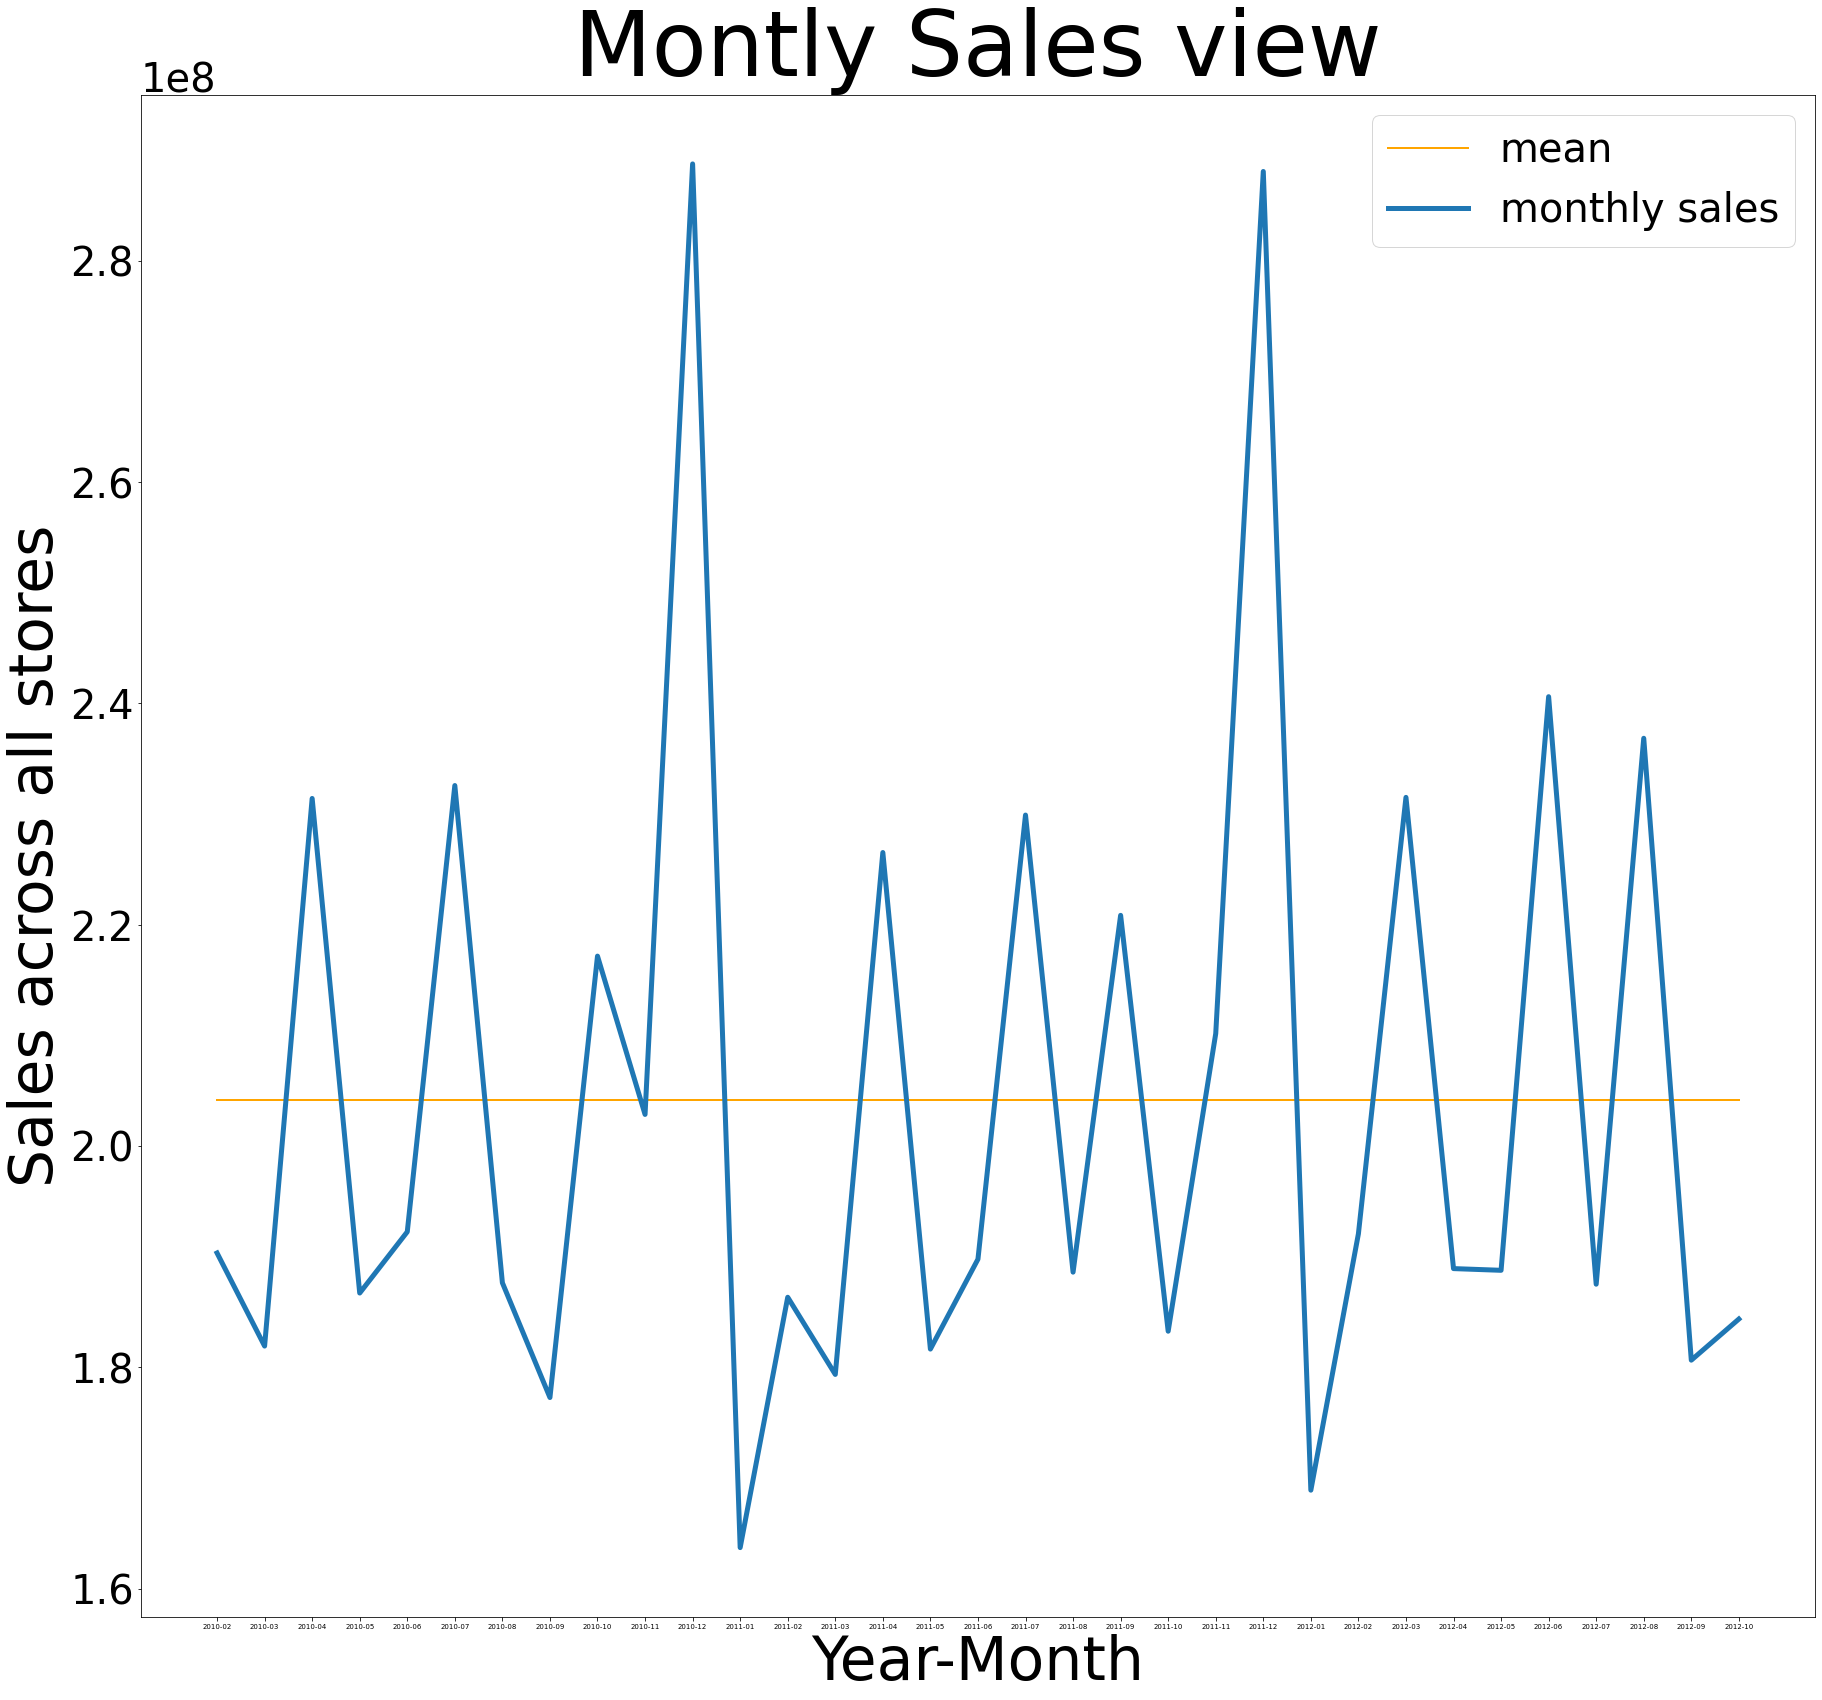

In [ ]:
%matplotlib inline
X_axis= monthly.index
X_axis=X_axis.astype('str')
X_axis
m_mean= np.ones(monthly['Total_sales_monthly'].shape[0]) * monthly['Total_sales_monthly'].mean()
sz, ax = plt.subplots(figsize=(30,28))
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=40)
plt.plot(X_axis,m_mean,color='orange',label='mean',linewidth=2)
plt.plot(X_axis,monthly['Total_sales_monthly'],label= 'monthly sales',linewidth=5)
plt.xlabel('Year-Month',fontsize=60)
plt.ylabel("Sales across all stores",fontsize=60)
plt.title('Montly Sales view',fontsize=90)
lege=ax.legend(prop={"size":40})
plt.show()

 Observations:
 
1)Highest Sales recorded in December 2010
Followed by another surge in sales on December 2011
 
2)Lowest Sales observed in January 2011 followed by another dip in sales on January 2012

*Semester-wise data preparation of total sales*

In [ ]:
#freq = 6M wasn't working so implement the semester-wise data
semester = monthly.groupby([pd.PeriodIndex(monthly.index, freq='Q')]).agg('sum')
semester.drop('Total_sales_monthly',axis=1,inplace=True)
semester['Total_sales']=semester.sum(axis=1)
semester['Year']=semester.index.year
semester

Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,Total_sales,Year
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010Q1,12178638.08,15942113.37,3245878.82,15824390.55,2343866.68,12584072.71,4084727.62,7164781.20,4059419.05,16258128.55,11310733.15,8378265.17,15328837.19,17138032.50,4955612.67,3739624.59,6273645.51,9110759.45,11657130.86,16547027.02,6098120.55,7898426.53,10522880.36,10549468.34,5248226.38,7670568.08,13731842.76,11725195.29,4203091.43,3727301.77,11143901.01,8642677.94,2299155.24,7452915.99,9200130.38,3609839.04,4097927.49,2745319.08,9943330.69,7395213.26,8315515.34,4260671.24,5202832.02,2211695.24,6230855.35,3.722528e+08,2010
2010Q2,19436822.02,25367303.89,4846326.40,24456978.54,4039168.42,21177229.33,5878724.13,11377001.36,6755216.11,24472636.06,17212781.46,12861849.27,25216748.15,29039924.35,8462332.25,5962988.52,11013273.16,15278831.50,19322354.31,26696176.19,9742561.66,13573686.34,18128295.23,17859370.24,9590333.08,12902480.04,24901070.24,17087928.73,7125112.93,5945123.56,17436683.89,14628371.67,3806035.41,12125806.07,15139217.15,6012154.54,6666390.60,4506935.36,17409179.32,12290145.62,15027180.12,6920671.35,8664111.22,3666642.99,10339321.97,6.103695e+08,2010
2010Q3,19150229.91,24294571.41,4677436.11,24509634.50,3793442.31,19818639.28,7324631.54,10980771.86,6342670.43,23589722.75,16784486.82,12170302.95,24478949.34,27358314.58,8213151.57,7308664.49,11300617.25,14410726.30,19084621.85,25916754.86,9658428.18,13067869.27,17757214.83,18204864.36,8953231.93,13199765.58,24277771.34,16492035.55,6765707.15,5806764.64,16988177.39,14429218.24,3316841.73,11967538.31,13621940.53,5785089.89,6481530.55,4460190.54,17393693.75,12460010.69,15801717.99,6869236.94,8921017.95,3751643.36,9548292.44,5.974881e+08,2010
2010Q4,22513141.99,29673875.52,5975777.67,30889467.22,4659553.36,23332379.37,8279994.86,13681920.42,7971914.17,30151714.85,19947136.80,14959966.47,30248200.77,31925970.95,10392431.82,7717354.99,12517384.52,17178100.05,22516421.62,32573122.65,12131997.88,16325298.27,21300714.89,20276945.30,11344476.35,14617884.08,27102492.23,19473605.36,8852915.98,6259896.66,19991510.47,17490668.83,3344801.88,14604156.42,14234682.87,5746042.22,7262621.22,4875349.54,21036072.56,14211989.95,18593807.20,7447510.38,8749044.80,3977537.86,12417873.61,7.087757e+08,2010
2011Q1,18187314.02,22490219.49,4788712.40,24334050.96,3622913.48,17322518.08,6784888.17,10772715.96,6163149.89,22568829.70,15717684.79,11751055.32,21866123.68,22576049.63,6483821.43,5772629.73,9747200.77,11687199.44,15767432.88,23921181.50,8721941.67,10980233.88,14014804.23,14669471.36,7221106.77,10838835.79,19149816.74,16089589.00,5821011.19,5332347.63,16749908.13,12970675.24,2986832.28,11375528.29,9187319.59,4825230.98,6299980.12,4404320.01,15200413.53,10442257.73,13597639.57,6796769.07,7362972.42,3440214.61,8586831.84,5.293917e+08,2011
2011Q2,20012527.14,23905954.94,4992546.69,26391646.52,4017730.98,19895542.95,6431791.60,11674026.04,7083712.37,23438994.31,16960804.05,12843472.67,25424102.04,26573493.92,8079441.41,6070599.83,11381622.99,13467637.80,18338944.81,26566868.33,9954939.35,13274695.99,17544031.85,17004201.70,8982409.66,12521358.19,23174015.16,16813095.76,6948053.94,5621043.57,18211838.58,14996590.01,3271255.32,12350646.04,10802206.72,4960767.63,6795883.52,4845434.03,18232693.07,12285042.92,16242320.66,7210256.34,8252572.34,3858479.31,10242761.27,5.979481e+08,2011
2011Q3,20752182.38,24852062.86,5242697.07,28888165.93,4209061.89,20901950.12,8881023.91,12015568.35,7296441.59,24626956.14,18192765.07,13185815.04,27499449.78,27509662.21,8391262.09,7912603.65,12645327.53,13106653.75,19878587.59,28196615.83,10366886.81,13803737.63,19508002.57,19043083.42,9448504.41,14474678.48,24776784.22,17533627.73,7081919.09,5655542.34,19456731.66,16251494.45,3463164.29,12795845.01,11401282.82,4996138.13,7146428.92,5412680.85,20220257.64,13610190.19,18055275.48,7649050.84,8431103.56,4202659.63,103885

In [ ]:
semester['QTR']=semester.index.quarter
collate=semester['QTR'].values
for i in range(collate.shape[0]):
 if collate[i] in range(1,3):
  collate[i] = '1'
 if collate[i] in range(3,5):
  collate[i] = '2'    
 
year=semester['Year'].values.astype(str)
for i in range(collate.shape[0]):
 collate[i] = str(year[i])  + str(collate[i])
 
semester['SEM'] = collate
semester

Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,Total_sales,Year,QTR,SEM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010Q1,12178638.08,15942113.37,3245878.82,15824390.55,2343866.68,12584072.71,4084727.62,7164781.20,4059419.05,16258128.55,11310733.15,8378265.17,15328837.19,17138032.50,4955612.67,3739624.59,6273645.51,9110759.45,11657130.86,16547027.02,6098120.55,7898426.53,10522880.36,10549468.34,5248226.38,7670568.08,13731842.76,11725195.29,4203091.43,3727301.77,11143901.01,8642677.94,2299155.24,7452915.99,9200130.38,3609839.04,4097927.49,2745319.08,9943330.69,7395213.26,8315515.34,4260671.24,5202832.02,2211695.24,6230855.35,3.722528e+08,2010,20101,20101
2010Q2,19436822.02,25367303.89,4846326.40,24456978.54,4039168.42,21177229.33,5878724.13,11377001.36,6755216.11,24472636.06,17212781.46,12861849.27,25216748.15,29039924.35,8462332.25,5962988.52,11013273.16,15278831.50,19322354.31,26696176.19,9742561.66,13573686.34,18128295.23,17859370.24,9590333.08,12902480.04,24901070.24,17087928.73,7125112.93,5945123.56,17436683.89,14628371.67,3806035.41,12125806.07,15139217.15,6012154.54,6666390.60,4506935.36,17409179.32,12290145.62,15027180.12,6920671.35,8664111.22,3666642.99,10339321.97,6.103695e+08,2010,20101,20101
2010Q3,19150229.91,24294571.41,4677436.11,24509634.50,3793442.31,19818639.28,7324631.54,10980771.86,6342670.43,23589722.75,16784486.82,12170302.95,24478949.34,27358314.58,8213151.57,7308664.49,11300617.25,14410726.30,19084621.85,25916754.86,9658428.18,13067869.27,17757214.83,18204864.36,8953231.93,13199765.58,24277771.34,16492035.55,6765707.15,5806764.64,16988177.39,14429218.24,3316841.73,11967538.31,13621940.53,5785089.89,6481530.55,4460190.54,17393693.75,12460010.69,15801717.99,6869236.94,8921017.95,3751643.36,9548292.44,5.974881e+08,2010,20102,20102
2010Q4,22513141.99,29673875.52,5975777.67,30889467.22,4659553.36,23332379.37,8279994.86,13681920.42,7971914.17,30151714.85,19947136.80,14959966.47,30248200.77,31925970.95,10392431.82,7717354.99,12517384.52,17178100.05,22516421.62,32573122.65,12131997.88,16325298.27,21300714.89,20276945.30,11344476.35,14617884.08,27102492.23,19473605.36,8852915.98,6259896.66,19991510.47,17490668.83,3344801.88,14604156.42,14234682.87,5746042.22,7262621.22,4875349.54,21036072.56,14211989.95,18593807.20,7447510.38,8749044.80,3977537.86,12417873.61,7.087757e+08,2010,20102,20102
2011Q1,18187314.02,22490219.49,4788712.40,24334050.96,3622913.48,17322518.08,6784888.17,10772715.96,6163149.89,22568829.70,15717684.79,11751055.32,21866123.68,22576049.63,6483821.43,5772629.73,9747200.77,11687199.44,15767432.88,23921181.50,8721941.67,10980233.88,14014804.23,14669471.36,7221106.77,10838835.79,19149816.74,16089589.00,5821011.19,5332347.63,16749908.13,12970675.24,2986832.28,11375528.29,9187319.59,4825230.98,6299980.12,4404320.01,15200413.53,10442257.73,13597639.57,6796769.07,7362972.42,3440214.61,8586831.84,5.293917e+08,2011,20111,20111
2011Q2,20012527.14,23905954.94,4992546.69,26391646.52,4017730.98,19895542.95,6431791.60,11674026.04,7083712.37,23438994.31,16960804.05,12843472.67,25424102.04,26573493.92,8079441.41,6070599.83,11381622.99,13467637.80,18338944.81,26566868.33,9954939.35,13274695.99,17544031.85,17004201.70,8982409.66,12521358.19,23174015.16,16813095.76,6948053.94,5621043.57,18211838.58,14996590.01,3271255.32,12350646.04,10802206.72,4960767.63,6795883.52,4845434.03,18232693.07,12285042.92,16242320.66,7210256.34,8252572.34,3858479.31,10242761.27,5.979481e+08,2011,20111,20111
2011Q3,20752182.38,24852062.86,5242697.07,28888165.93,4209061.89,20901950.12,8881023.91,12015568.35,7296441.59,24626956.14,18192765.07,13185815.04,27499449.78,27509662.21,8391262.09,7912603.65,12645327.53,13106653.75,19878587.59,28196615.83,10366886.81,13803737.63,19508002.57,19043083.42,9448504.41,14474678.48,24776784.22,17533627.73,7081919.09,5655542.34,19456731.66,16251494.45,3463164.29,12795845.01,11401282.82,4996138.13,7146428.92,5412

In [ ]:
semester.drop(['Year','QTR'], axis=1,inplace=True)

In [ ]:
semester=semester.groupby('SEM').agg('sum')
semester

Store,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,Total_sales
SEM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20101,31615460.10,41309417.26,8092205.22,40281369.09,6383035.10,33761302.04,9963451.75,18541782.56,10814635.16,40730764.61,28523514.61,21240114.44,40545585.34,46177956.85,13417944.92,9702613.11,17286918.67,24389590.95,30979485.17,43243203.21,15840682.21,21472112.87,28651175.59,28408838.58,14838559.46,20573048.12,38632913.00,28813124.02,11328204.36,9672425.33,28580584.90,23271049.61,6105190.65,19578722.06,24339347.53,9621993.58,10764318.09,7252254.44,27352510.01,19685358.88,23342695.46,11181342.59,13866943.24,5878338.23,16570177.32,9.826223e+08
20102,41663371.90,53968446.93,10653213.78,55399101.72,8452995.67,43151018.65,15604626.40,24662692.28,14314584.60,53741437.60,36731623.62,27130269.42,54727150.11,59284285.53,18605583.39,15026019.48,23818001.77,31588826.35,41601043.47,58489877.51,21790426.06,29393167.54,39057929.72,38481809.66,20297708.28,27817649.66,51380263.57,35965640.91,15618623.13,12066661.30,36979687.86,31919887.07,6661643.61,26571694.73,27856623.40,11531132.11,13744151.77,9335540.08,38429766.31,26672000.64,34395525.19,14316747.32,17670062.75,7729181.22,21966166.05,1.306264e+09
20111,38199841.16,46396174.43,9781259.09,50725697.48,7640644.46,37218061.03,13216679.77,22446742.00,13246862.26,46007824.01,32678488.84,24594527.99,47290225.72,49149543.55,14563262.84,11843229.56,21128823.76,25154837.24,34106377.69,50488049.83,18676881.02,24254929.87,31558836.08,31673673.06,16203516.43,23360193.98,42323831.90,32902684.76,12769065.13,10953391.20,34961746.71,27967265.25,6258087.60,23726174.33,19989526.31,9785998.61,13095863.64,9249754.04,33433106.60,22727300.65,29839960.23,14007025.41,15615544.76,7298693.92,18829593.11,1.127340e+09
20112,42722077.67,52211706.99,11035617.48,60366595.85,8830175.54,43310701.92,17445960.75,25066044.16,15439107.39,52909070.73,37845094.05,27987472.58,57247287.61,56946727.15,17719362.06,15578137.93,25263016.00,29062902.87,40735522.49,59348952.53,21558002.92,29299782.06,40714697.71,38265303.81,20230889.29,28689057.74,49598852.29,36253323.82,15181280.07,11228757.21,39207478.81,33379928.23,6699749.07,26634007.73,24097452.32,9186620.14,13985632.13,10691004.41,42344496.70,27613242.28,36875914.08,15110277.26,16437650.69,8199500.75,22305774.77,1.320860e+09
20121,41702522.95,49611825.58,11042126.21,56384673.97,8703744.52,40301849.88,15083506.48,23789038.23,14694918.97,48239313.82,35500422.26,26948134.93,52191997.73,49632027.50,14976025.04,12964815.70,24052615.94,27086304.74,35604832.52,54495805.11,18602904.03,25724138.68,34538337.40,33814399.61,17610096.94,25226410.61,43037024.56,34222139.27,13486897.76,11442641.72,36594251.30,30085859.15,6936561.15,25415154.05,20481171.59,8317554.72,13730065.80,11283694.56,38954732.55,24408141.69,33341550.17,15391895.02,16501154.42,8416102.15,20196035.40,1.210765e+09
20122,26499535.07,31884869.79,6982313.29,36386515.27,5465093.61,26013197.12,10284049.99,15444881.90,9279110.61,29989303.12,22683643.42,16386710.79,34515457.29,27809370.76,9851505.67,9137609.62,16232762.69,17832272.06,23607600.76,35331904.27,11648982.68,16931517.55,24229641.35,23371996.56,11880408.77,17750033.68,28883031.56,21106767.80,8757483.86,7353008.36,23290155.92,20195256.85,4498989.88,16324010.10,14756550.93,4968915.81,8882708.89,7347378.89,26930930.30,16764265.65,23546289.76,9558464.83,10474079.55,5771271.57,12527594.77,7.893674e+08


[ ANS 6] Plot Semester wise data

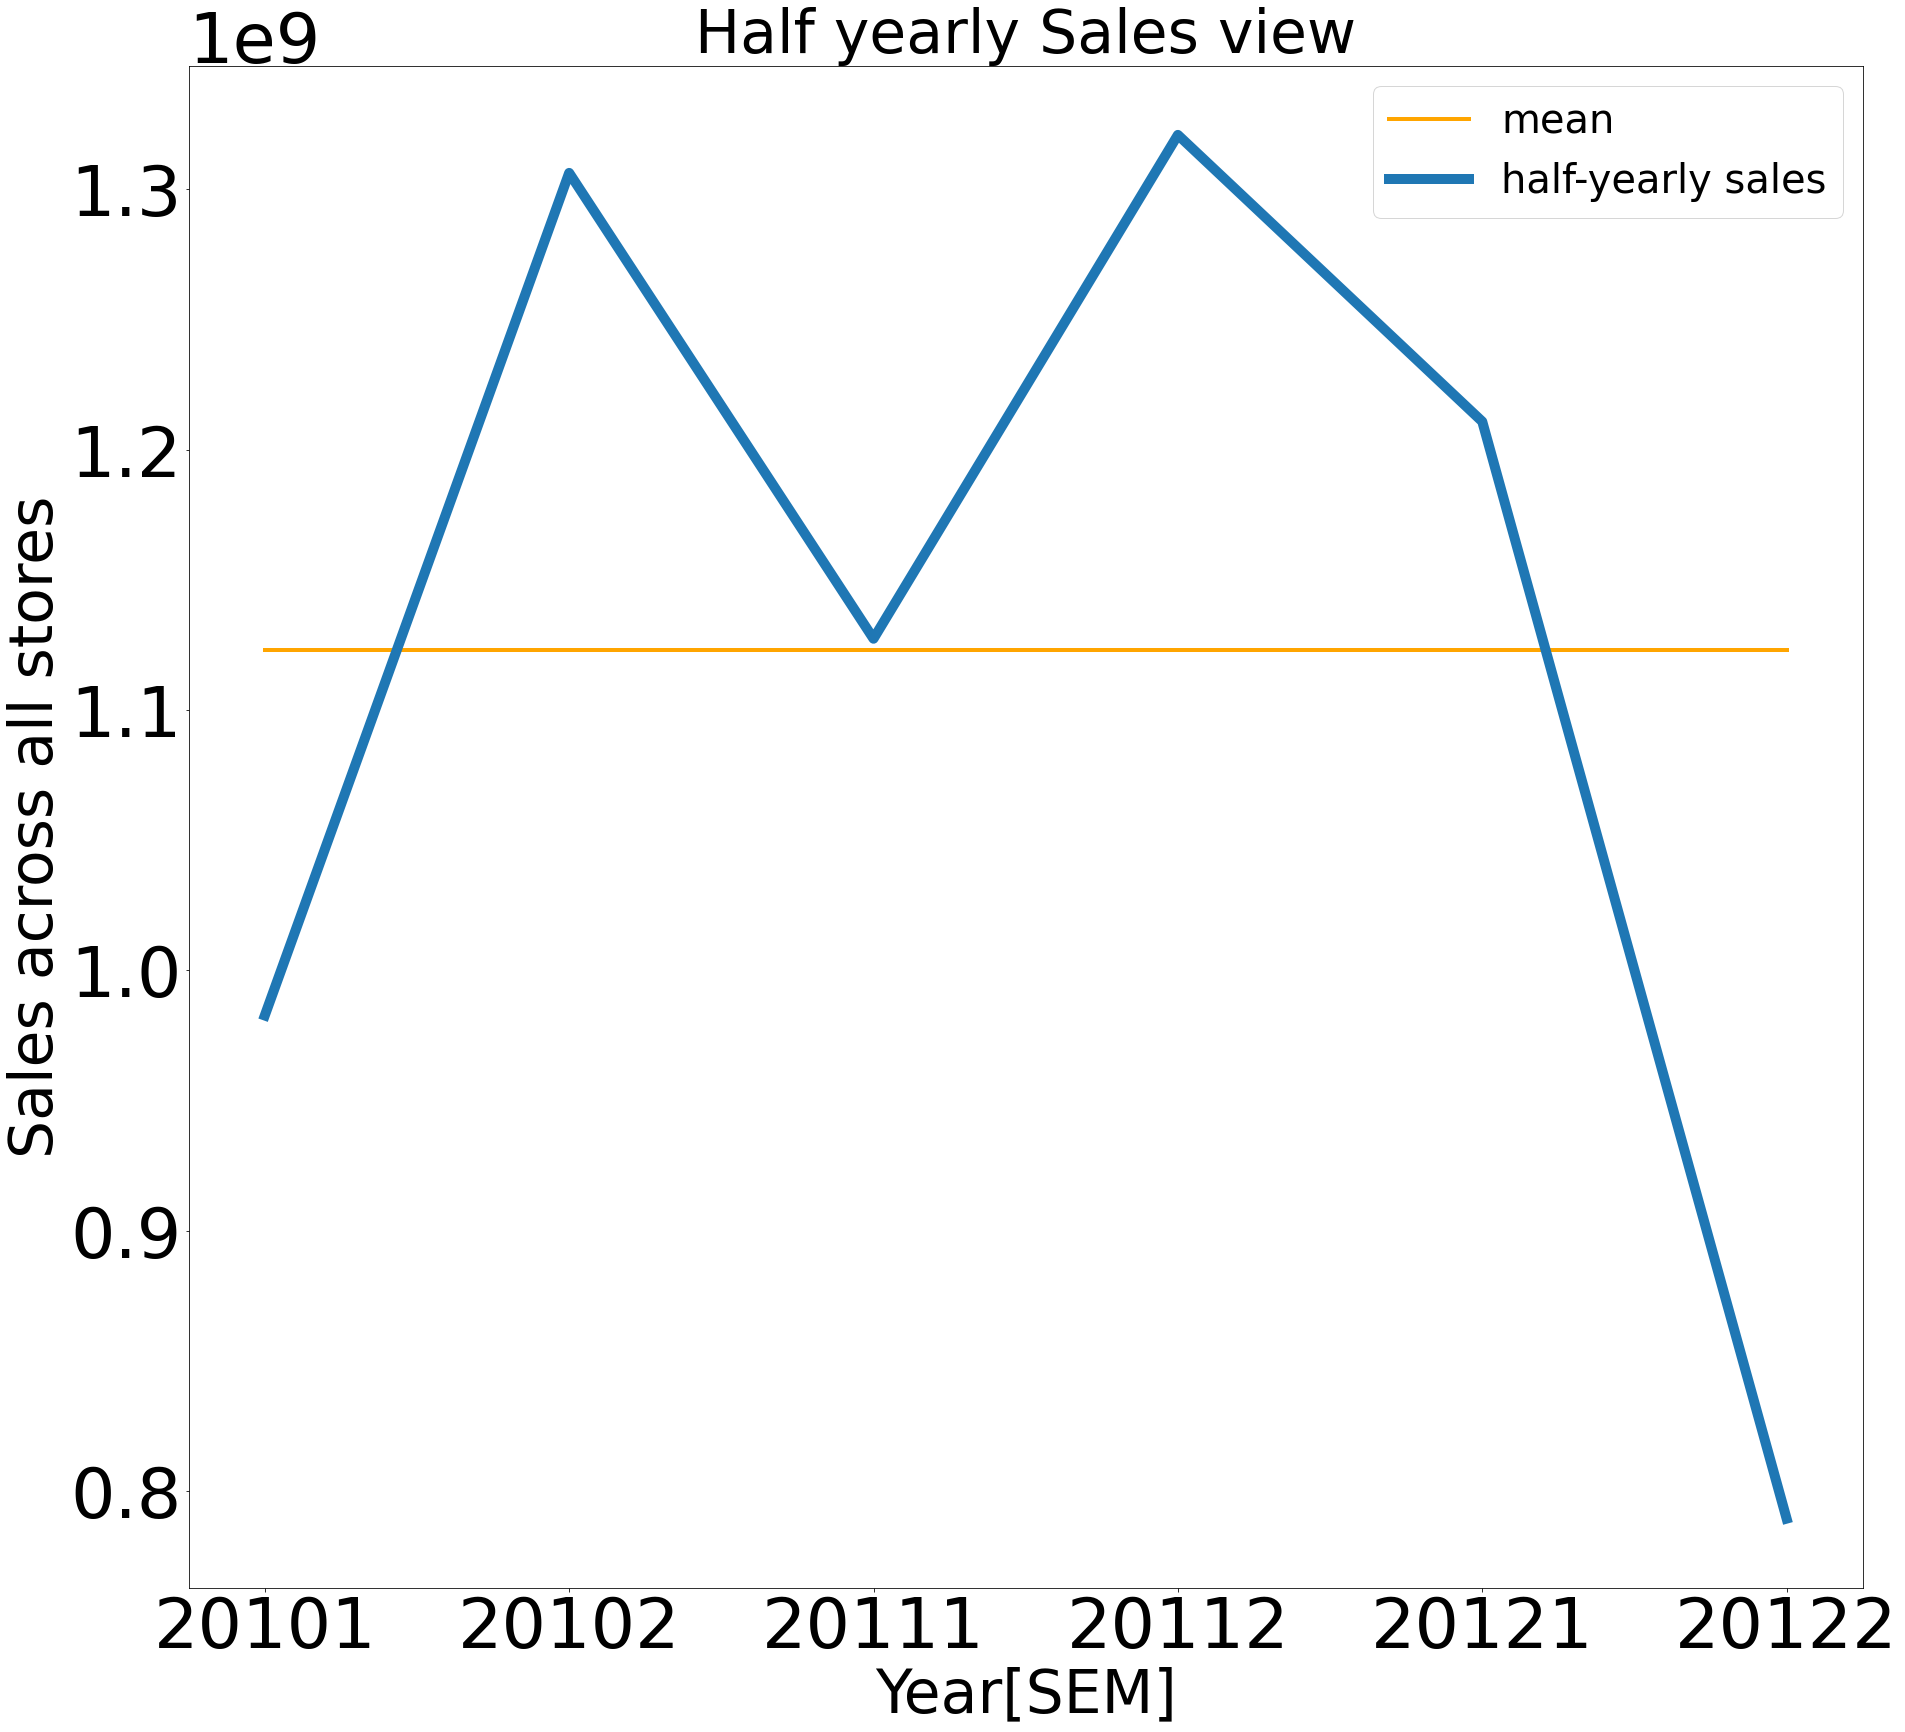

In [ ]:
 %matplotlib inline
X1_axis= semester.index
X1_axis=X1_axis.astype('str')
m_mean= np.ones(semester['Total_sales'].shape[0]) * semester['Total_sales'].mean()
sz, ax = plt.subplots(figsize=(30,28))
plt.rc('xtick', labelsize=70) 
plt.rc('ytick', labelsize=70) 
plt.plot(X1_axis,m_mean,'orange',label='mean',linewidth=4)
plt.plot(X1_axis,semester['Total_sales'],label='half-yearly sales',linewidth=10 )
plt.xlabel('Year[SEM]',fontsize=60)
plt.ylabel("Sales across all stores",fontsize=60)
plt.title('Half yearly Sales view',fontsize=60)
leg=ax.legend(prop={"size":40})
plt.show()

 Observations from half yearly data:
 
1)The first half of 2010 saw the lowest sales
 
2)The second half of 2011 saw the highest sales.
Another surge in sales is seen in the second half of 2010
 
3) Since complete data for 2nd semester of 2012 is not available judgements are reserved

#Statistical Model#

Extract data for store #1 only

In [ ]:
store_data= Dataset[Dataset['Store']==1]
df=store_data.copy()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


As seen in EDA above, the time of the year affects sales. In order to understand how time of the year affects sales, restructure date to week number (of the year ), hence values can range from 1-52.

In [ ]:
 
#Restructuring date into new variable as week number 
df['week_of_year'] = df.Date.apply(lambda x: x.weekofyear)
#restructure the Dataframe
df=df[['Store','Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','week_of_year','Weekly_Sales']]
df

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week_of_year,Weekly_Sales
0,1,2010-02-05,0,42.31,2.572,211.096358,8.106,5,1643690.90
1,1,2010-02-12,1,38.51,2.548,211.242170,8.106,6,1641957.44
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,7,1611968.17
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,8,1409727.59
4,1,2010-03-05,0,46.50,2.625,211.350143,8.106,9,1554806.68
5,1,2010-03-12,0,57.79,2.667,211.380643,8.106,10,1439541.59
6,1,2010-03-19,0,54.58,2.720,211.215635,8.106,11,1472515.79
7,1,2010-03-26,0,51.45,2.732,211.018042,8.106,12,1404429.92
8,1,2010-04-02,0,62.27,2.719,210.820450,7.808,13,1594968.28
9,1,2010-04-09,0,65.86,2.770,210.622857,7.808,14,1545418.53


In [ ]:
#See how the values are distributed 
df.describe()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week_of_year,Weekly_Sales
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02
mean,0.069930,68.306783,3.219699,215.996892,7.610420,25.818182,1.555264e+06
std,0.255926,14.250486,0.427313,4.350890,0.383749,14.177763,1.559808e+05
min,0.000000,35.400000,2.514000,210.337426,6.573000,1.000000,1.316899e+06
25%,0.000000,58.265000,2.764500,211.549277,7.348000,14.000000,1.458105e+06
50%,0.000000,69.640000,3.290000,215.459905,7.787000,26.000000,1.534850e+06
75%,0.000000,80.485000,3.594000,220.531330,7.838000,37.500000,1.614892e+06
max,1.000000,91.650000,3.907000,223.444251,8.106000,52.000000,2.387950e+06


In [ ]:
df.drop(['Store','Date'],axis=1,inplace=True)
#Since we want to predict sales X features are assigned values excluding the last columns 
X_df=df.iloc[:,:-1].values
Y_df=df.iloc[:,-1].values
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week_of_year,Weekly_Sales
0,0,42.31,2.572,211.096358,8.106,5,1643690.90
1,1,38.51,2.548,211.242170,8.106,6,1641957.44
2,0,39.93,2.514,211.289143,8.106,7,1611968.17
3,0,46.63,2.561,211.319643,8.106,8,1409727.59
4,0,46.50,2.625,211.350143,8.106,9,1554806.68
5,0,57.79,2.667,211.380643,8.106,10,1439541.59
6,0,54.58,2.720,211.215635,8.106,11,1472515.79
7,0,51.45,2.732,211.018042,8.106,12,1404429.92
8,0,62.27,2.719,210.820450,7.808,13,1594968.28
9,0,65.86,2.770,210.622857,7.808,14,1545418.53


Visualize how data of each feature is spread

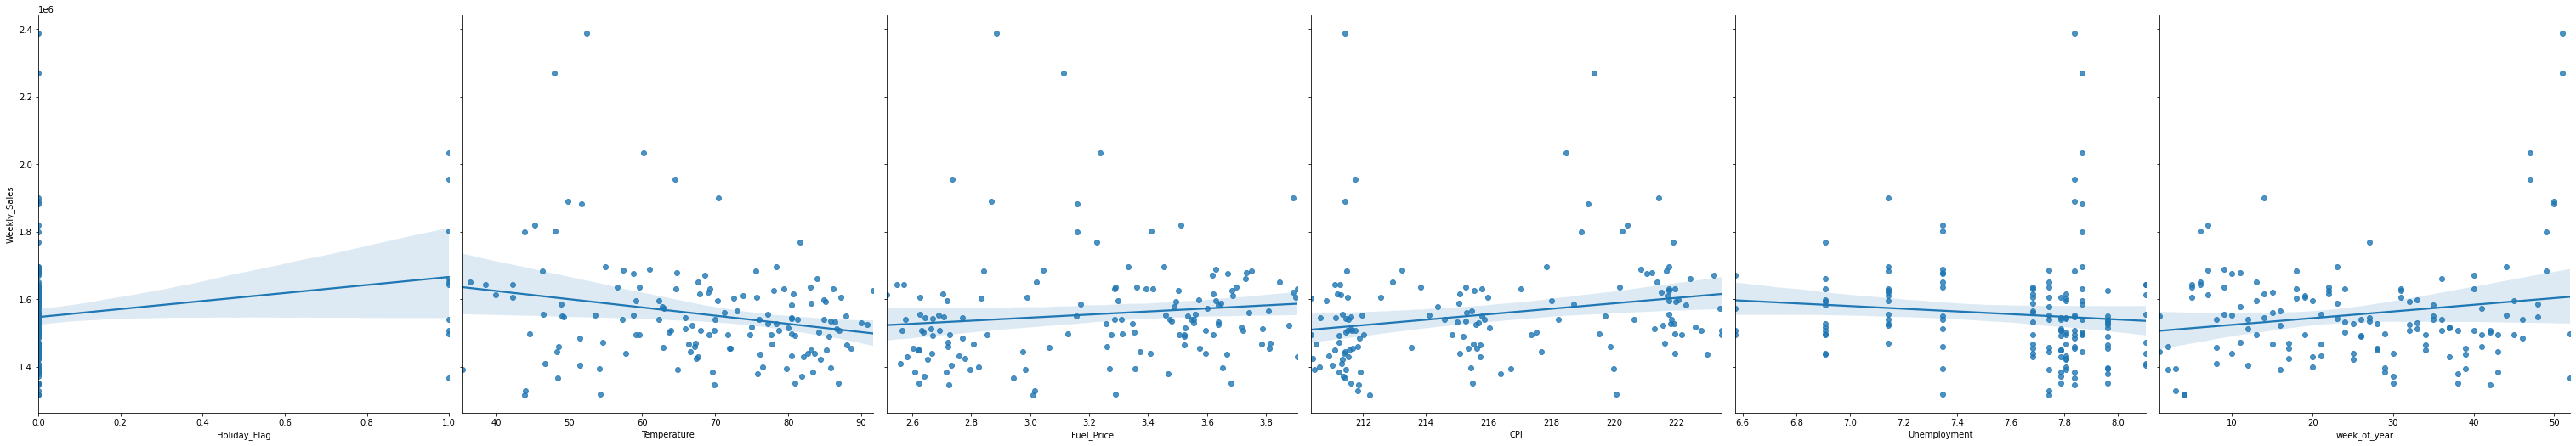

In [ ]:
sb.pairplot(df, x_vars=df.columns[:-1], y_vars='Weekly_Sales', height=7, aspect=1, kind='reg')

As seen above, the data has high spread from the regression line hence linear regression may not be very useful

Import necessary libraries

In [ ]:
from sklearn import  model_selection
from sklearn.preprocessing import StandardScaler

[ANS 7-A] Create linear model

In [ ]:
Linear_Reg = linear_model.LinearRegression()
Linear_Reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Create train-test data by splitting the dataset

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_df,Y_df)

Fit the model without any standardisation

In [ ]:
Linear_Reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check model score

In [ ]:
Linear_Reg.score(X_test,Y_test)

0.23589752508873638

Use Standard Scaler to see if it helps with the score

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train,Y_train)
scaler.fit_transform(X_test,Y_test)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
 Linear_Reg=linear_model.LinearRegression()
Linear_Reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
 Linear_Reg.score(X_test,Y_test)

0.23589752508873638

 The model score is low however the data spread was observed to be non linear

In [ ]:
df[df.columns].corr()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week_of_year,Weekly_Sales
Holiday_Flag,1.000000,-0.200543,-0.085903,-0.028919,0.082949,0.127743,0.194905
Temperature,-0.200543,1.000000,0.228493,0.118503,-0.180695,0.248223,-0.222701
Fuel_Price,-0.085903,0.228493,1.000000,0.755259,-0.513944,-0.091050,0.124592
CPI,-0.028919,0.118503,0.755259,1.000000,-0.813471,0.064502,0.225408
Unemployment,0.082949,-0.180695,-0.513944,-0.813471,1.000000,0.029407,-0.097955
week_of_year,0.127743,0.248223,-0.091050,0.064502,0.029407,1.000000,0.179821
Weekly_Sales,0.194905,-0.222701,0.124592,0.225408,-0.097955,0.179821,1.000000


From correlation table:
 
A negative relationship is seen between Temperature and weekly_sales i.e. if temperature increases sales decreases
 
 
A positive relationship is seen between holiday week and weekly_sales i.e. higher sales during holidays
 
A positive relationship is seen between CPI and weekly_sales i.e. high sales when CPI is high
 
Sales  increase in the latter half of the year (week of the year in positive correlation with sales)

*Check the liner model equation:*
Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [ ]:
Linear_Reg.coef_

array([66601.733008  , -2598.22865974, 42442.84088998,  5247.77018991,
       22072.65804677,  2613.94140123])

[Ans 7-B ]
 
Hypothesis from model coefficients:
 
Fuel_Price has positive impact on sales
 
CPI has a positive impact on sales
 
Unemployment has a negative impact on sales

Model #2 Polynomial regression:
 
since the score of linear regression was low and the spread of data was huge, polynomial regression is a good choice

In [ ]:
 from sklearn.preprocessing import PolynomialFeatures
from sklearn. metrics import r2_score

In [ ]:
X_data=X_df.copy()
X_data

array([[  0.       ,  42.31     ,   2.572    , 211.0963582,   8.106    ,
          5.       ],
       [  1.       ,  38.51     ,   2.548    , 211.2421698,   8.106    ,
          6.       ],
       [  0.       ,  39.93     ,   2.514    , 211.2891429,   8.106    ,
          7.       ],
       [  0.       ,  46.63     ,   2.561    , 211.3196429,   8.106    ,
          8.       ],
       [  0.       ,  46.5      ,   2.625    , 211.3501429,   8.106    ,
          9.       ],
       [  0.       ,  57.79     ,   2.667    , 211.3806429,   8.106    ,
         10.       ],
       [  0.       ,  54.58     ,   2.72     , 211.215635 ,   8.106    ,
         11.       ],
       [  0.       ,  51.45     ,   2.732    , 211.0180424,   8.106    ,
         12.       ],
       [  0.       ,  62.27     ,   2.719    , 210.8204499,   7.808    ,
         13.       ],
       [  0.       ,  65.86     ,   2.77     , 210.6228574,   7.808    ,
         14.       ],
       [  0.       ,  66.32     ,   2.808    , 210

In [ ]:
PolyReg = PolynomialFeatures(degree =2)
Multi=PolyReg.fit_transform(X_data)

In [ ]:
 X_train, X_test, Y_train, Y_test = model_selection.train_test_split(Multi,Y_df)

In [ ]:
Poly_Reg= linear_model.LinearRegression()

In [ ]:
Poly_Reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Use the polynomial model to make predictions and save it to a variable

In [ ]:
Y_pred=Poly_Reg.predict(X_test)

Plot Actual Vs Predicted to see how the model performed

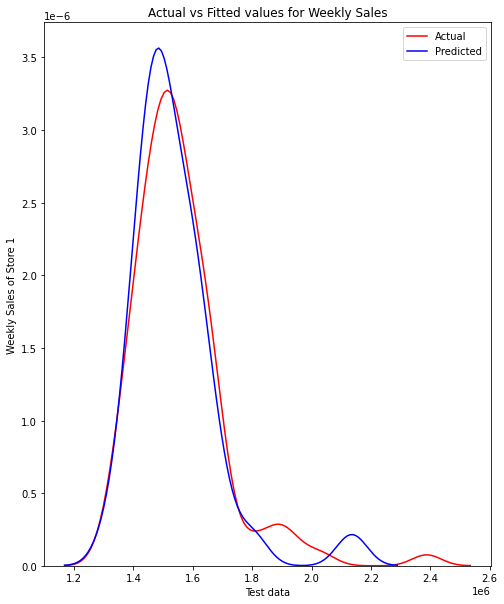

In [ ]:
plt.figure(figsize=(8, 10))
ax1 = sb.distplot(Y_train, hist=False, color="r", label="Actual")
sb.distplot(Y_pred, hist=False, color="b", label="Predicted",ax=ax1)
 
plt.title('Actual vs Fitted values for Weekly Sales')
plt.xlabel('Test data')
plt.ylabel('Weekly Sales of Store 1')
 
plt.show()
plt.close()

[ANS-8]
 
 Model #2 (Polynomial regression of degree 2) is the model that fits the data better